In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read data and store in dataframes
raw_data = pd.read_csv('Raw_Data\data.csv')
wx1 = pd.read_csv('Raw_Data\wx1.csv')
wx2 = pd.read_csv('Raw_Data\wx2.csv')
wx3 = pd.read_csv('Raw_Data\wx3.csv')
wx4 = pd.read_csv('Raw_Data\wx4.csv')

raw_data['datetime'] = pd.to_datetime(raw_data['datetime'], format='%d/%m/%Y %H:%M',)
wx1['datetime'] = pd.to_datetime(wx1['datetime'], format='%d/%m/%Y %H:%M',)
wx2['datetime'] = pd.to_datetime(wx2['datetime'], format='%d/%m/%Y %H:%M',)
wx3['datetime'] = pd.to_datetime(wx3['datetime'], format='%d/%m/%Y %H:%M',)
wx4['datetime'] = pd.to_datetime(wx4['datetime'], format='%d/%m/%Y %H:%M',)

In [5]:
print ('raw_data min/max date: %s / %s' % (raw_data.datetime.min().date(), raw_data.datetime.max().date()))
print ('wx1  min/max date: %s / %s' % ( wx1.datetime.min().date(),  wx1.datetime.max().date()))
print ('wx2  min/max date: %s / %s' % ( wx2.datetime.min().date(),  wx2.datetime.max().date()))
print ('wx3  min/max date: %s / %s' % ( wx3.datetime.min().date(),  wx3.datetime.max().date()))
print ('wx4  min/max date: %s / %s' % ( wx4.datetime.min().date(),  wx4.datetime.max().date()))

print ('')
print ('Number of days in raw_data: %d' % ((raw_data.datetime.max() - raw_data.datetime.min()).days + 1))
print ('Number of days in wx1:  %d' % (( wx1.datetime.max() -  wx1.datetime.min()).days + 1))
print ('Number of days in wx2:  %d' % (( wx2.datetime.max() -  wx2.datetime.min()).days + 1))
print ('Number of days in wx3:  %d' % (( wx3.datetime.max() -  wx3.datetime.min()).days + 1))
print ('Number of days in wx4:  %d' % (( wx4.datetime.max() -  wx4.datetime.min()).days + 1))

print ('')
print ('raw_data shape: %d rows' % raw_data.shape[0])
print ('wx1 shape: %d rows'  % wx1.shape[0])
print ('wx2 shape: %d rows'  % wx2.shape[0])
print ('wx3 shape: %d rows'  % wx3.shape[0])
print ('wx4 shape: %d rows'  % wx4.shape[0])

raw_data min/max date: 2014-07-24 / 2016-05-26
wx1  min/max date: 2014-01-01 / 2017-01-01
wx2  min/max date: 2014-01-01 / 2017-01-01
wx3  min/max date: 2014-01-01 / 2017-01-01
wx4  min/max date: 2016-05-30 / 2016-12-22

Number of days in raw_data: 673
Number of days in wx1:  1096
Number of days in wx2:  1096
Number of days in wx3:  1096
Number of days in wx4:  206

raw_data shape: 53761 rows
wx1 shape: 52115 rows
wx2 shape: 51996 rows
wx3 shape: 58922 rows
wx4 shape: 2240 rows


In [31]:
print(raw_data[' Power'].nunique())
print(wx1.Temperature.nunique())
print(wx2.Temperature.nunique())
print(wx3.Temperature.nunique())
print(wx4.Temperature.nunique())

4154
381
302
373
313


In [61]:
(raw_data[' Power'].value_counts().tail())
wx4.Temperature.value_counts().head()
wx3.Temperature.value_counts().head()
wx2.Temperature.value_counts().head()
wx1.Temperature.value_counts().head()

raw_data_unique = raw_data[' Power'].unique()
raw_data_unique_sorted = np.sort(raw_data_unique)


In [79]:
raw_data.isnull().sum(axis=0).head(15)

datetime    0
 Power      0
dtype: int64

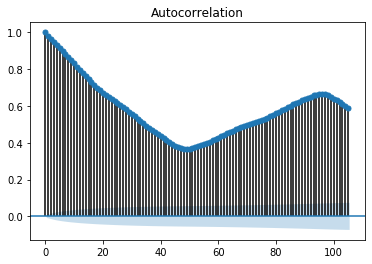

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(raw_data[' Power'], lags=105);


(0, 680)

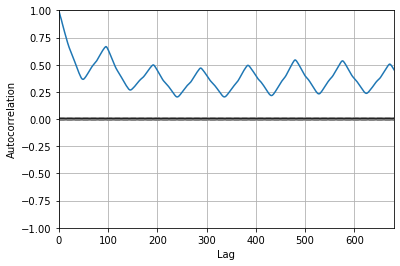

In [75]:
from pandas.plotting import autocorrelation_plot

ax = autocorrelation_plot(raw_data[' Power'])
ax.set_xlim([0, 680])

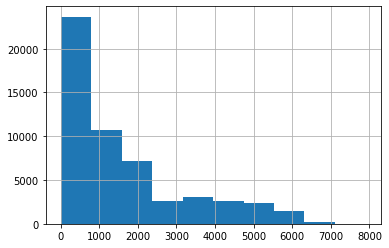

In [81]:
raw_data[' Power'].hist()

In [87]:
ranges = [0,10,20,30,40,50,60,70,80,90,100,1000,2000,3000,4000,5000,6000,7000,8000,9000]
raw_data[' Power'].groupby(pd.cut(raw_data[' Power'], ranges)).count()


 Power
(0, 10]             2
(10, 20]            4
(20, 30]            5
(30, 40]           15
(40, 50]           27
(50, 60]           23
(60, 70]           52
(70, 80]           50
(80, 90]           53
(90, 100]          86
(100, 1000]     27619
(1000, 2000]    10753
(2000, 3000]     4870
(3000, 4000]     3853
(4000, 5000]     3064
(5000, 6000]     2725
(6000, 7000]      543
(7000, 8000]       17
(8000, 9000]        0
Name:  Power, dtype: int64

(8500, 10000)

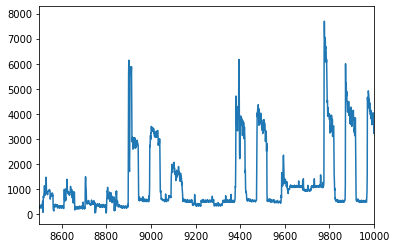

In [104]:
qx = raw_data[' Power'].plot()
qx.set_xlim([8500,10000])

In [107]:
raw_data.sort_values("datetime", inplace=True)
wx1.sort_values("datetime", inplace=True)
wx2.sort_values("datetime", inplace=True)
wx3.sort_values("datetime", inplace=True)
wx4.sort_values("datetime", inplace=True)

In [118]:
q = pd.merge_asof(raw_data, wx1, left_on="datetime", right_on="datetime")
q1 = pd.merge_asof(q, wx2, left_on="datetime", right_on="datetime")
q2 = pd.merge_asof(q1, wx3, left_on="datetime", right_on="datetime")
q3 = pd.merge_asof(q2, wx4, left_on="datetime", right_on="datetime")
q3.head(40)

,datetime,Power,Temperature_x,Temperature_y,Temperature_x,Temperature_y
0,2014-07-24 12:30:00,499.247996,22.0,21.0,19.0,NaN
1,2014-07-24 12:45:00,530.257188,21.0,21.0,19.0,NaN
2,2014-07-24 13:00:00,477.541561,21.0,21.8,19.0,NaN
3,2014-07-24 13:15:00,463.587425,22.0,21.8,19.0,NaN
4,2014-07-24 13:30:00,395.367202,22.0,21.8,19.0,NaN
5,2014-07-24 13:45:00,393.816742,22.0,21.8,19.0,NaN
6,2014-07-24 14:00:00,345.752494,21.8,22.0,19.2,NaN
7,2014-07-24 14:15:00,376.761686,21.0,22.0,19.2,NaN
8,2014-07-24 14:30:00,468.238804,21.0,22.0,20.0,NaN
9,2014-07-24 14:45:00,513.202132,22.0,22.0,20.0,NaN
